In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_height =180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


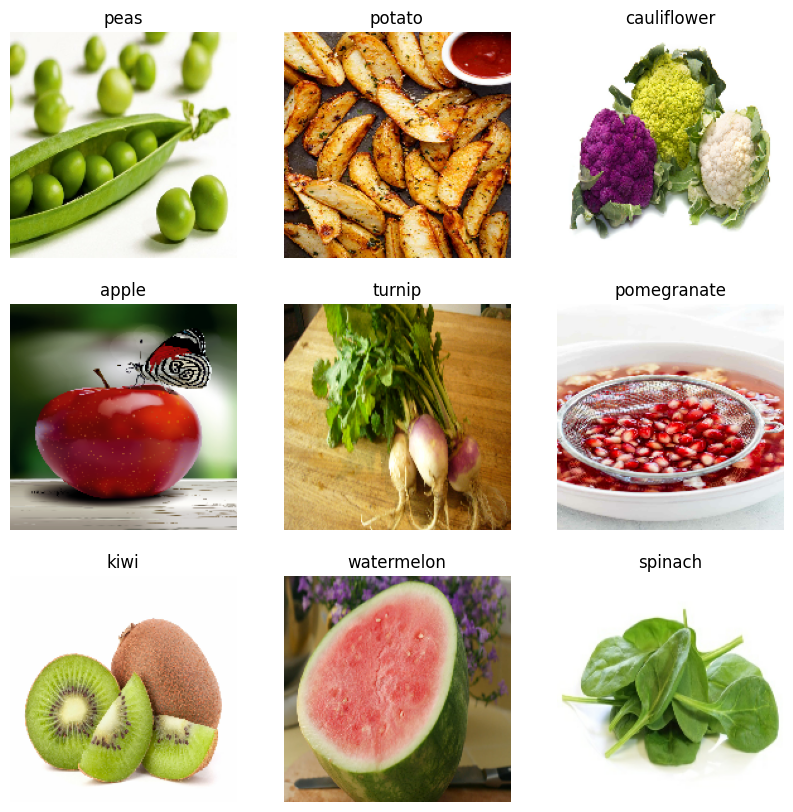

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 447ms/step - accuracy: 0.0512 - loss: 3.7705 - val_accuracy: 0.2137 - val_loss: 2.6644
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - accuracy: 0.2231 - loss: 2.7442 - val_accuracy: 0.6154 - val_loss: 1.6498
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.4390 - loss: 2.0023 - val_accuracy: 0.7892 - val_loss: 0.9318
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 397ms/step - accuracy: 0.6489 - loss: 1.2398 - val_accuracy: 0.8775 - val_loss: 0.6980
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 417ms/step - accuracy: 0.7967 - loss: 0.7519 - val_accuracy: 0.8946 - val_loss: 0.4942
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.8842 - loss: 0.4328 - val_accuracy: 0.9259 - val_loss: 0.4661
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 437ms/step - accuracy: 0.9137 - loss: 0.3231 - val_accuracy: 0.9345 - val_loss: 0.5314
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 449ms/step - accuracy: 0.9353 - loss: 0.2900 - val_accu

Text(0.5, 1.0, 'Loss')

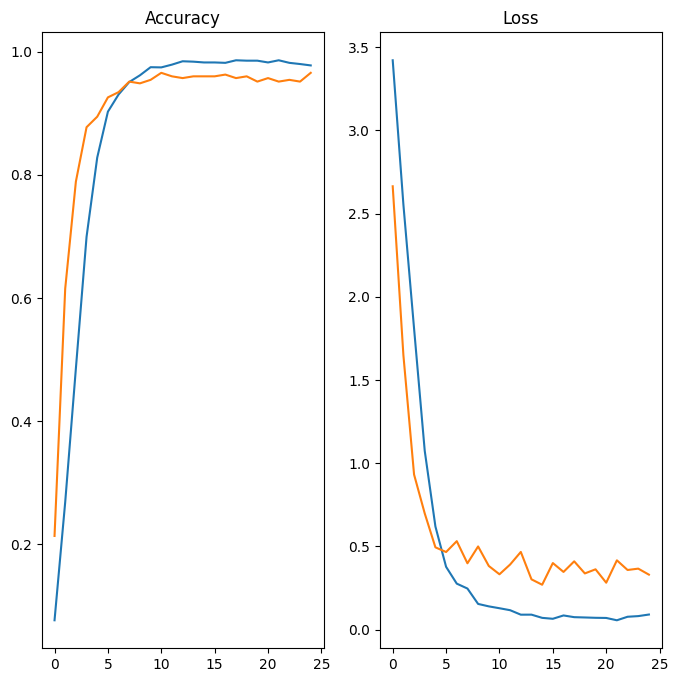

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [35]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [36]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


In [37]:
score = tf.nn.softmax(predict)

In [38]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.80


In [21]:
# 1. Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [22]:
# 2. Reload validation dataset with shuffle=False
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    shuffle=False
)

Found 351 files belonging to 36 classes.


In [23]:
# 3. Get class names
class_names = val_ds.class_names

In [24]:
# 4. Get true labels
y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())

In [25]:
# 5. Get predictions
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step


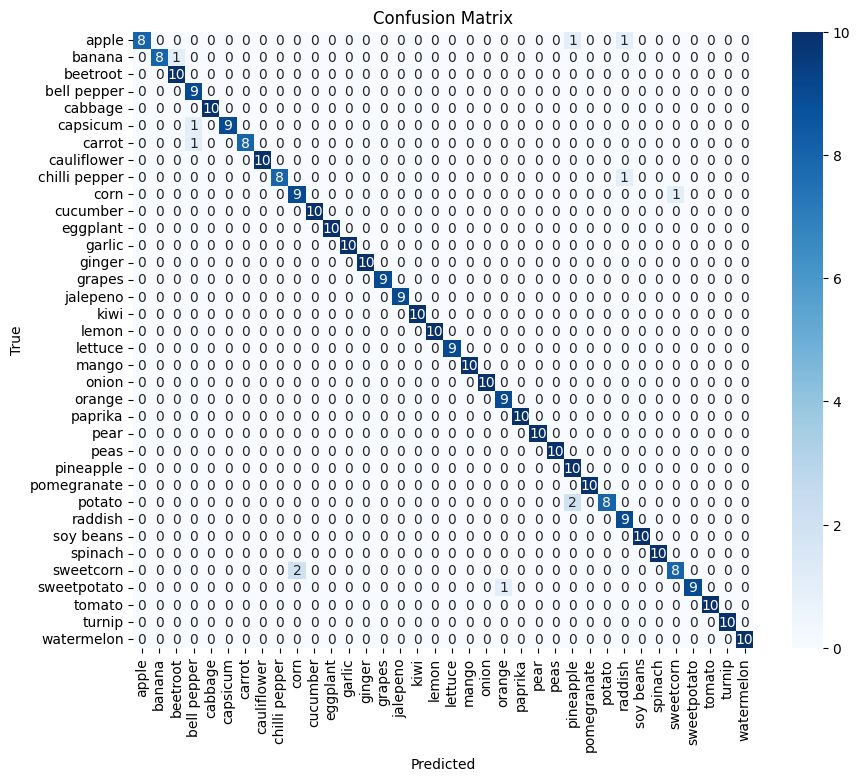

In [26]:
# 6. Create and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

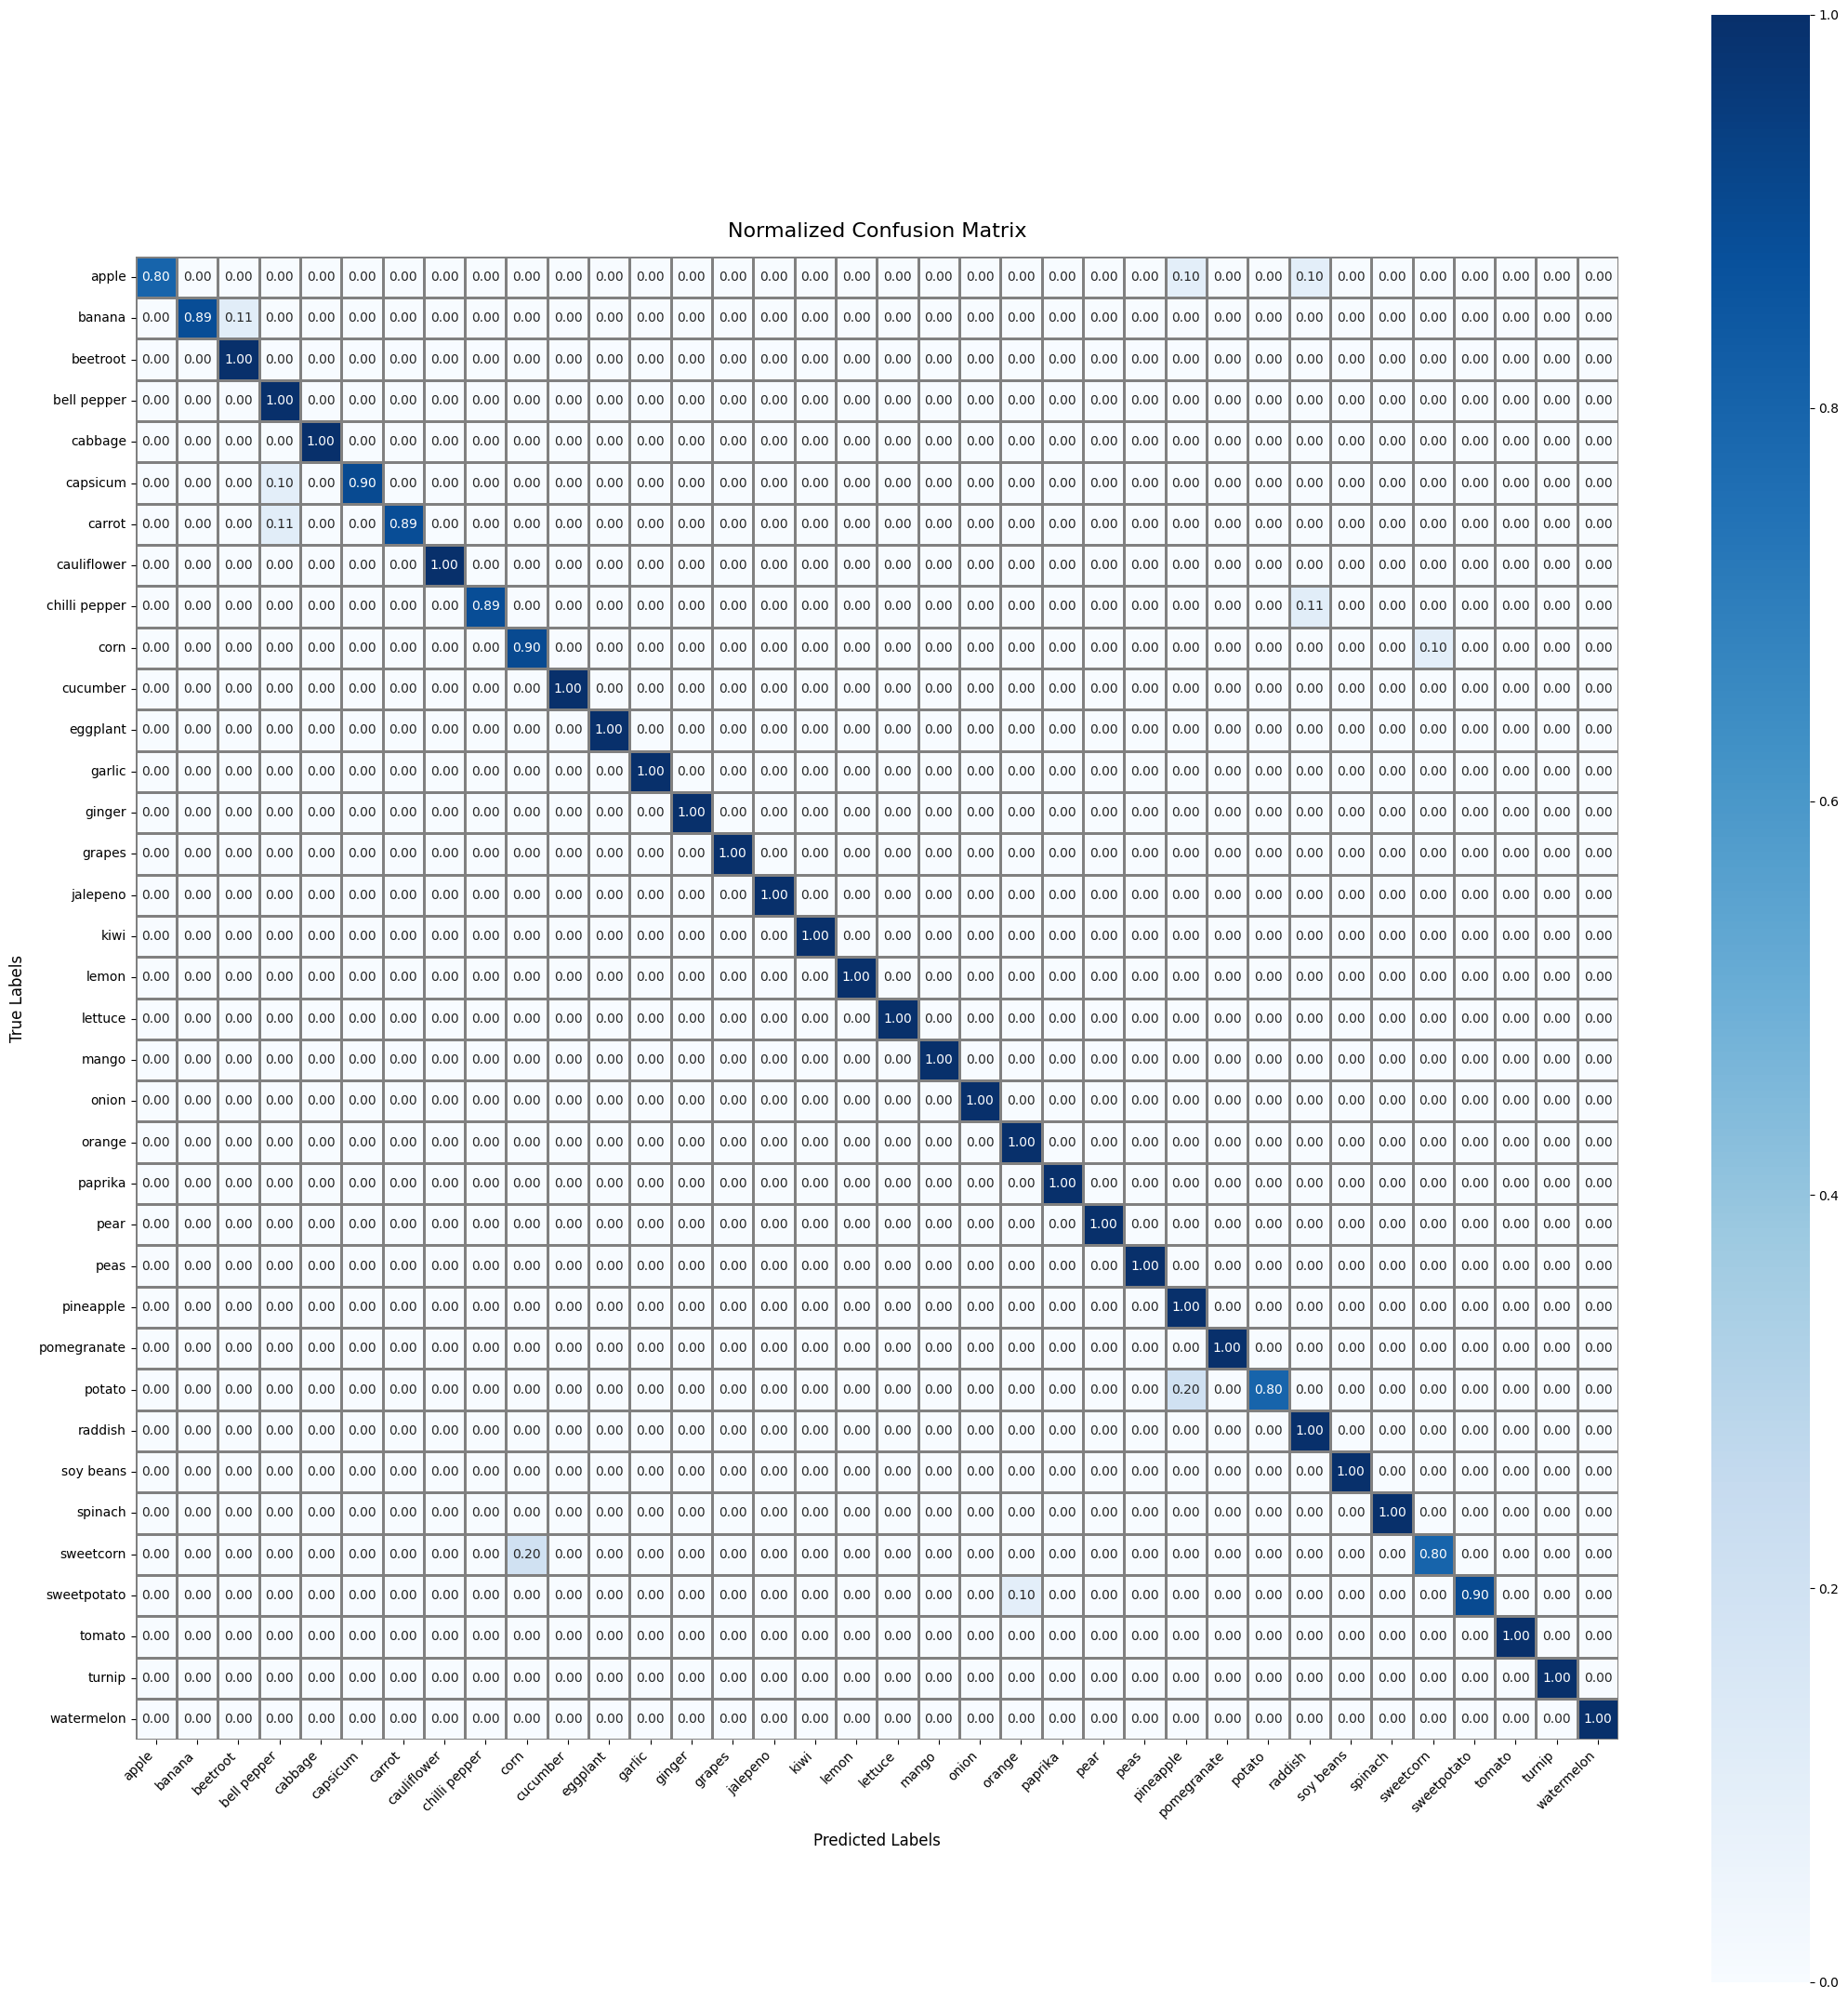

In [31]:
# Normalize confusion matrix safely
row_sums = cm.sum(axis=1, keepdims=True)
cm_normalized = np.divide(cm.astype('float'), row_sums, where=row_sums!=0)

# Set figure size according to number of classes
fig_width = max(10, len(class_names) * 0.6)
fig_height = max(8, len(class_names) * 0.6)

# Plot nicely
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm_normalized,
            annot=True,
            fmt='.2f',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            linewidths=1,      # Creates visible grid
            linecolor='gray',  # Grid color
            cbar=True,
            square=True)

# Labels and styling
plt.xlabel('Predicted Labels', fontsize=12, labelpad=10)
plt.ylabel('True Labels', fontsize=12, labelpad=10)
plt.title('Normalized Confusion Matrix', fontsize=16, pad=15)

# Rotate x-axis labels if too long
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Layout fix
plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import classification_report

# y_true and y_pred must be ready already
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


               precision    recall  f1-score   support

        apple       1.00      0.80      0.89        10
       banana       1.00      0.89      0.94         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.82      1.00      0.90         9
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.90      0.95        10
       carrot       1.00      0.89      0.94         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.89      0.94         9
         corn       0.82      0.90      0.86        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00         9
     jalepeno       1.00      1.00      1.00         9
         kiwi       1.00      1.00      1.00        10
        l

In [34]:
model.save('image_class_model.keras')  # modern format